<a href="https://colab.research.google.com/github/ankesh86/RecommendationSystems/blob/main/AssociationRuleMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline

from mlxtend.frequent_patterns import apriori, association_rules
from collections import Counter
from IPython.display import Image

# Importing data

In [2]:
data = pd.read_csv('sample_data/data.csv', encoding='unicode_escape')
data.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(541909, 8)

In [3]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.isnull().sum().sort_values(ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [5]:
data1 = data.dropna()
data1.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
data1 = data1[data1.Quantity > 0]
data1.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


## Loyal customers

In [7]:
data1['Amount'] = data1['Quantity'] * data1['UnitPrice']

orders = data1.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

print('Top 5 loyal customers with most number of orders..')
orders.sort_values(by='InvoiceNo', ascending=False).head()

Top 5 loyal customers with most number of orders..


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-7-56b20ecc484c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Amount'] = data1['Quantity'] * data1['UnitPrice']


,CustomerID,Country,InvoiceNo
4019,17841.0,United Kingdom,7847
1888,14911.0,EIRE,5677
1298,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4596
1670,14606.0,United Kingdom,2700


## Number of orders per customer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


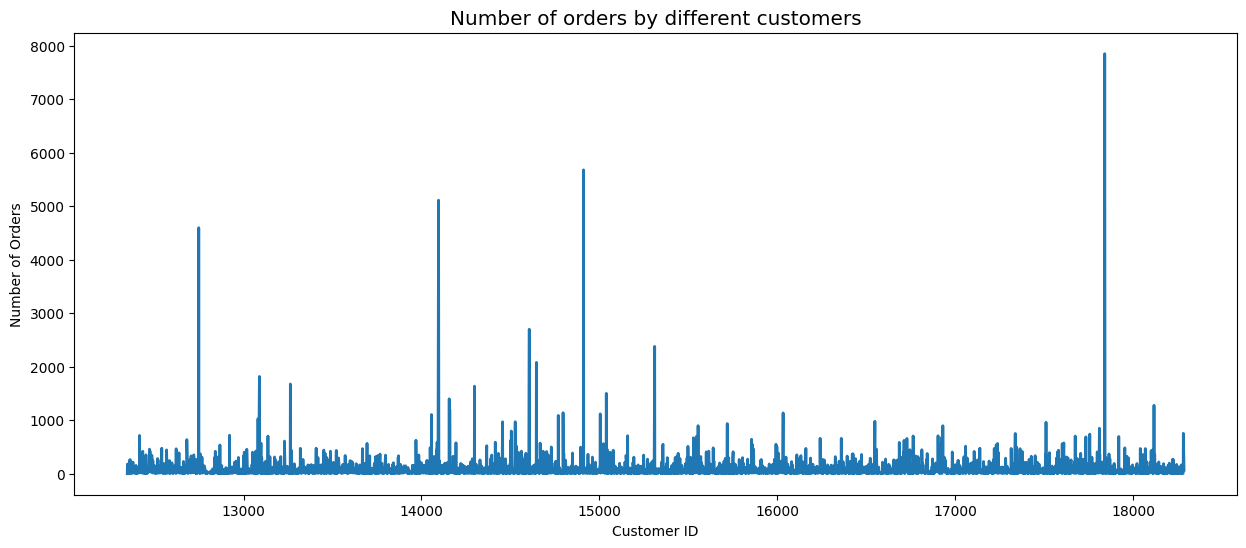

In [8]:
plt.subplots(figsize=(15,6))
plt.style.use('bmh')
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.title('Number of orders by different customers')
plt.show()

In [9]:
money_spent = data1.groupby(by=['CustomerID','Country'], as_index=False)['Amount'].sum()
print('Top 5 profitable customers witht the highest money spent..')
money_spent.sort_values(by='Amount', ascending=False).head()

Top 5 profitable customers witht the highest money spent..


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,Country,Amount
1698,14646.0,Netherlands,280206.02
4210,18102.0,United Kingdom,259657.30
3737,17450.0,United Kingdom,194550.79
3017,16446.0,United Kingdom,168472.50
1888,14911.0,EIRE,143825.06


## Money spent per customer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


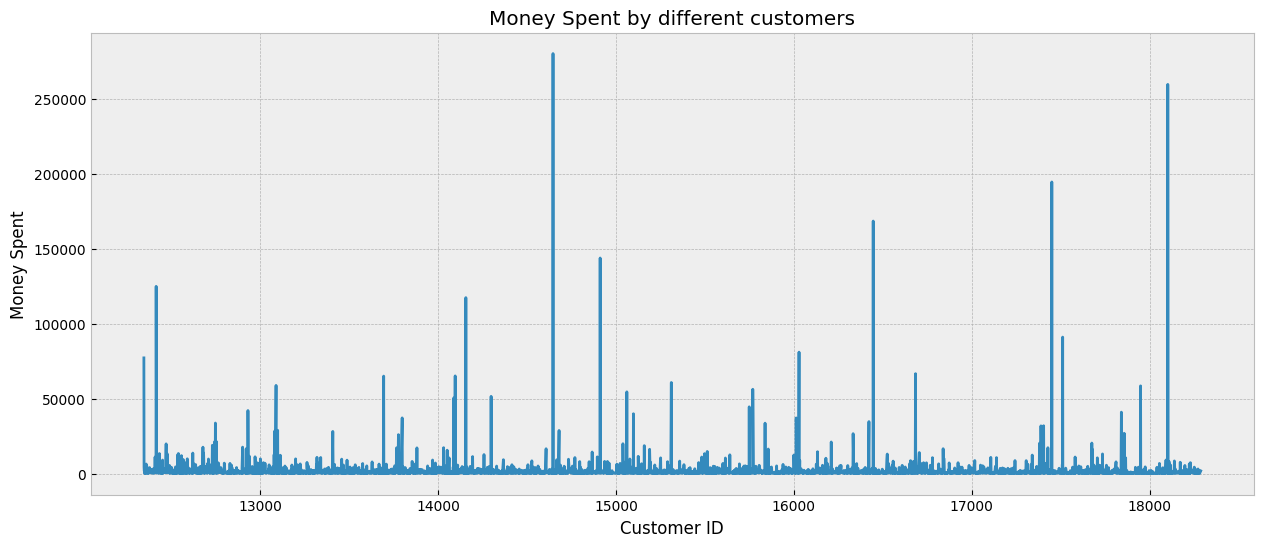

In [10]:
plt.subplots(figsize=(15,6))
plt.style.use('bmh')
plt.plot(money_spent.CustomerID, money_spent.Amount)
plt.xlabel('Customer ID')
plt.ylabel('Money Spent')
plt.title('Money Spent by different customers')
plt.show()

# **Pattern based on DateTime**

## Preprocessing the data

In [11]:
import datetime

data1['InvoiceDate'] = pd.to_datetime(data1.InvoiceDate, format='%m/%d/%Y %H:%M')
data1.insert(loc=2, column='year_month', value=data1['InvoiceDate'].map(lambda x: 100*x.year + x.month))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
#new feature for month
data1.insert(loc=3, column='month', value=data1.InvoiceDate.dt.month)

#new feature for date
data1.insert(loc=4, column='day', value=(data1.InvoiceDate.dt.dayofweek)+1)

#new feature for the hour
data1.insert(loc=5, column='hour', value=data1.InvoiceDate.dt.hour)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## How many orders per month

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


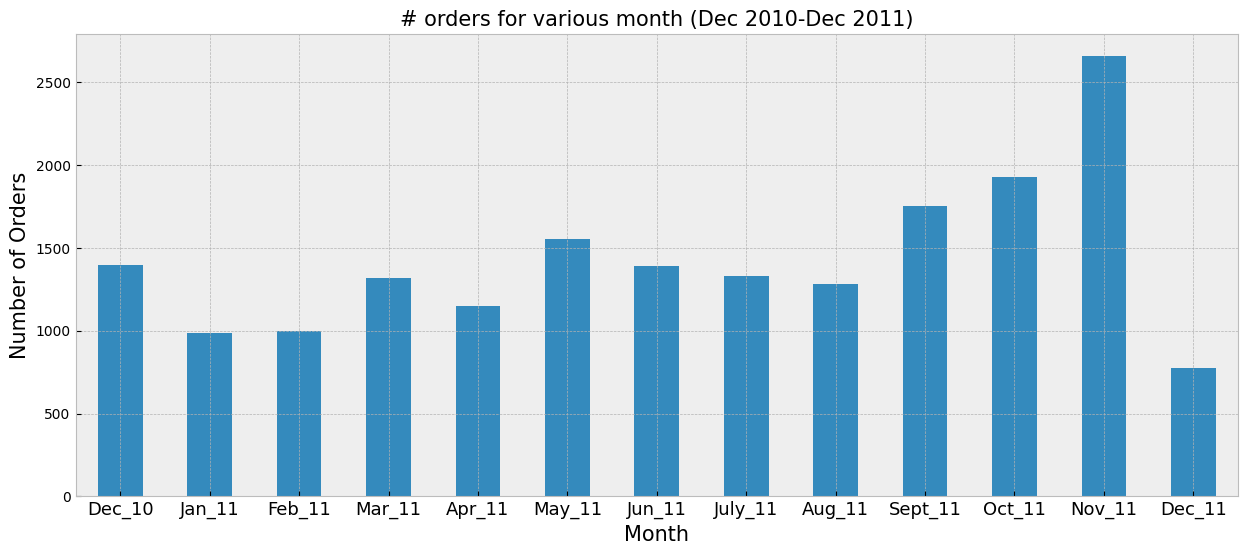

In [13]:
plt.style.use('bmh')

ax = data1.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind='bar', figsize=(15,6))
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Number of Orders', fontsize=15)
ax.set_title('# orders for various month (Dec 2010-Dec 2011)', fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sept_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

## **How many orders per day ?**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


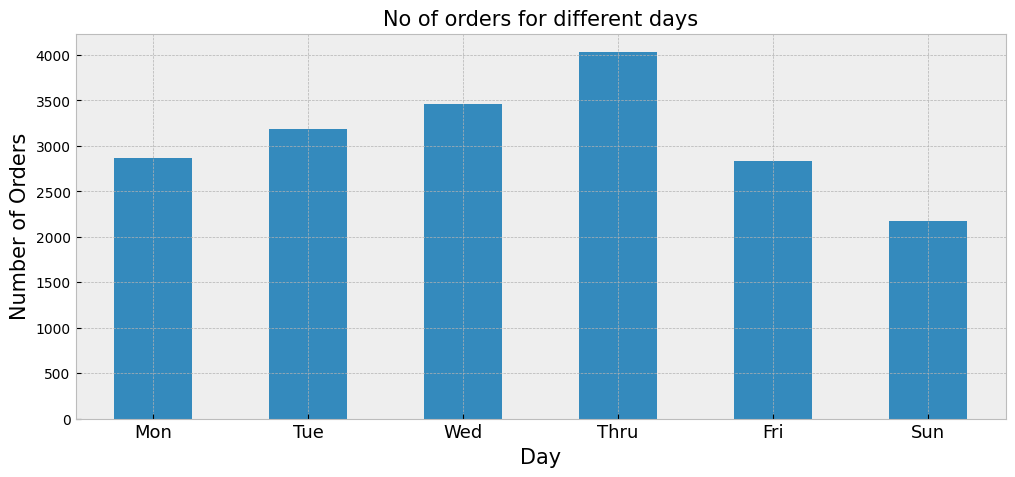

In [14]:
data1[data1['day']==6].shape[0]

#groupby number of invoices by day
ax = data1.groupby('InvoiceNo')['day'].unique().value_counts().sort_index().plot(kind='bar', figsize=(12,5))
ax.set_xlabel('Day', fontsize=15)
ax.set_ylabel('Number of Orders', fontsize=15)
ax.set_title('No of orders for different days', fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thru','Fri','Sun'), rotation='horizontal', fontsize=13)
plt.show()

## **How many orders are placed per hour ?**

In [15]:
data1.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,year_month,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,201012,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,201012,12,3,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,201012,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,201012,12,3,8,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,201012,12,3,8,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


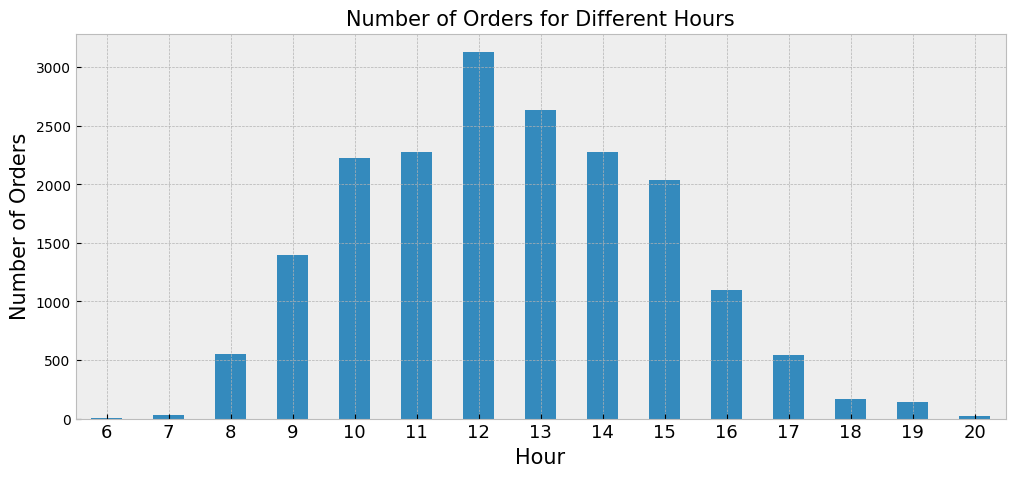

In [16]:
ax = data1.groupby('hour')['InvoiceNo'].nunique().plot(kind='bar', figsize=(12, 5))

ax.set_xlabel('Hour', fontsize=15)
ax.set_ylabel('Number of Orders', fontsize=15)
ax.set_title('Number of Orders for Different Hours', fontsize=15)
ax.set_xticklabels(range(6, 21), rotation='horizontal', fontsize=13)

plt.show()

# **Free items and sales**

In [17]:
data1.UnitPrice.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


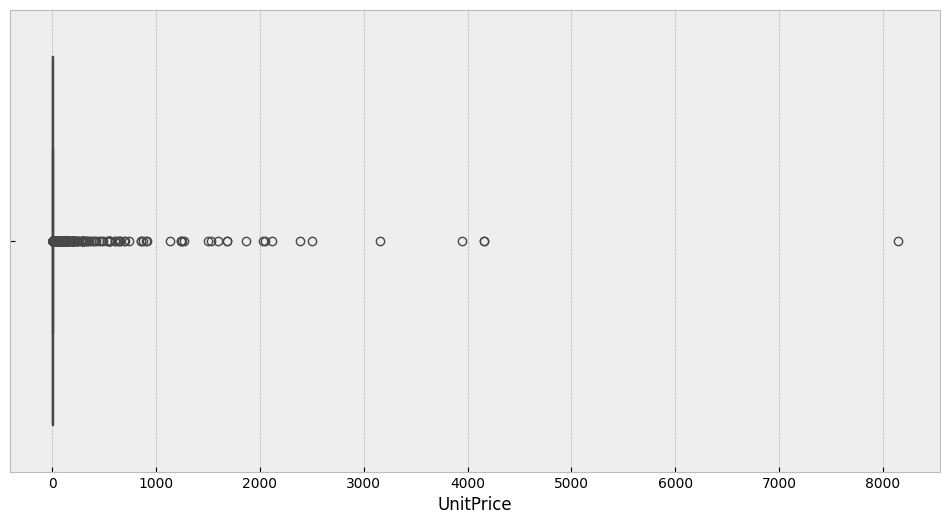

In [18]:
#checking distribution of unit prices
plt.subplots(figsize=(12,6))
sns.set_style('darkgrid')
sns.boxplot(x=data1.UnitPrice)
plt.show()

In [19]:
#don't observe that 0 is outlier
#create a new df for free items
free_items_df = data1[data1['UnitPrice']==0]
free_items_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,year_month,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
9302,537197,22841,201012,12,7,14,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany,0.0
33576,539263,22580,201012,12,4,14,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom,0.0
40089,539722,22423,201012,12,2,13,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE,0.0
47068,540372,22090,201101,1,4,16,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0.0
47070,540372,22553,201101,1,4,16,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0.0


In [20]:
#number of free items by month and year
free_items_df.year_month.value_counts().sort_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


year_month
201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


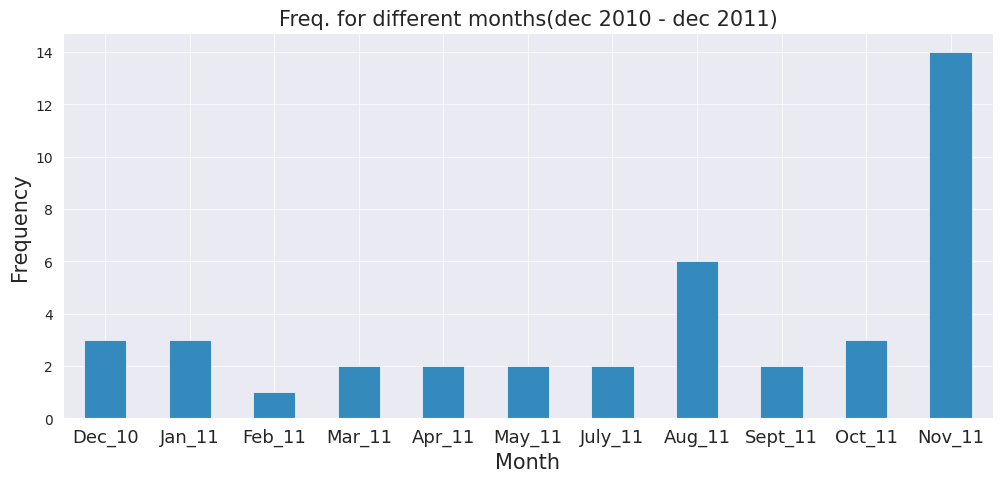

In [21]:
#free items per year and month
ax = free_items_df.year_month.value_counts().sort_index().plot(kind='bar', figsize=(12,5))
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
ax.set_title('Freq. for different months(dec 2010 - dec 2011)', fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Sept_11','Oct_11','Nov_11'), rotation='horizontal', fontsize=13)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


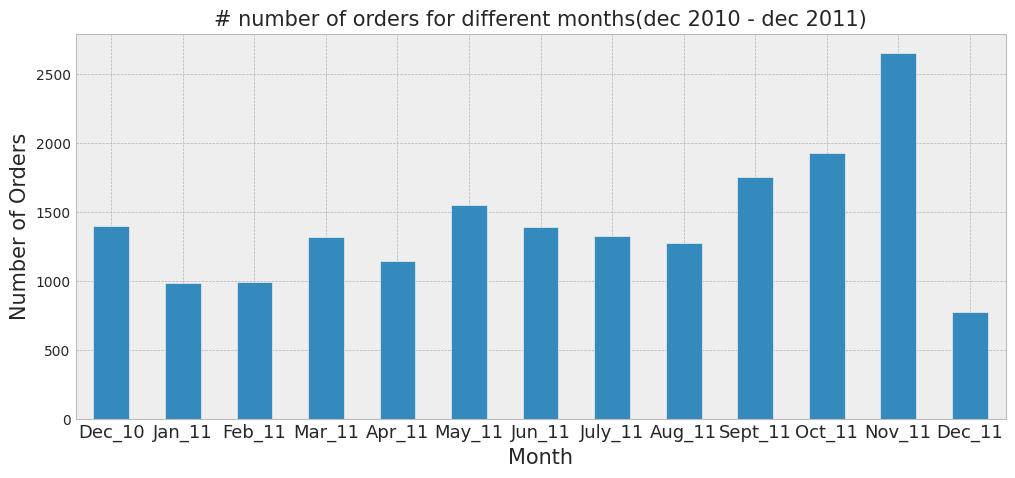

In [22]:
plt.style.use('bmh')
#group by to count the unique numbers of invoices by year and month
ax = data1.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind='bar', figsize=(12,5))
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Number of Orders', fontsize=15)
ax.set_title('# number of orders for different months(dec 2010 - dec 2011)', fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sept_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


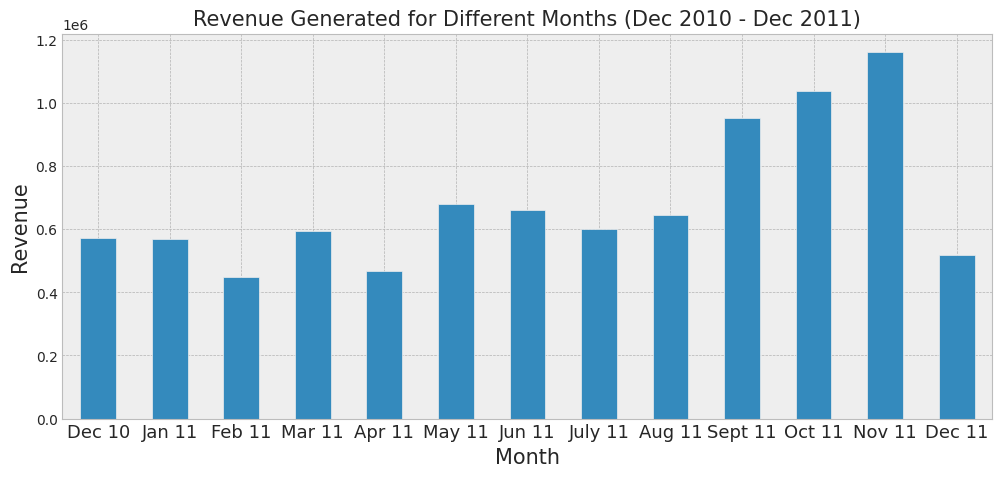

In [23]:
plt.style.use('bmh')
#group by to count the unique numbers of invoices by year and month
ax = data1.groupby('year_month')['Amount'].sum().plot(kind='bar', figsize=(12, 5))

# Setting the axis labels and title
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Revenue', fontsize=15)
ax.set_title('Revenue Generated for Different Months (Dec 2010 - Dec 2011)', fontsize=15)

# Setting custom x-tick labels
ax.set_xticklabels(['Dec 10', 'Jan 11', 'Feb 11', 'Mar 11', 'Apr 11', 'May 11', 'Jun 11', 'July 11', 'Aug 11', 'Sept 11', 'Oct 11', 'Nov 11', 'Dec 11'], rotation='horizontal', fontsize=13)

plt.show()

# **Item insights**

## Most items based on quantity

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Item')

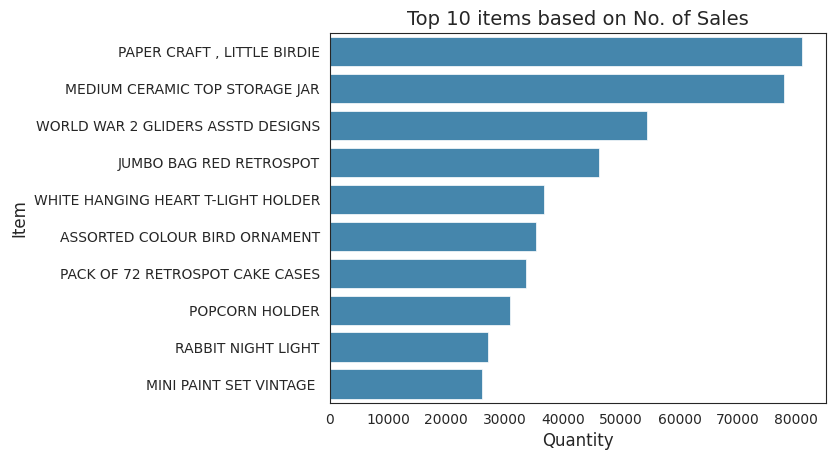

In [24]:
most_sold_items_df = data1.pivot_table(index=['StockCode','Description'], values='Quantity', aggfunc='sum').sort_values(by='Quantity', ascending=False)
most_sold_items_df.reset_index(inplace=True)
sns.set_style('white')
sns.barplot(y='Description', x='Quantity', data=most_sold_items_df.head(10))
plt.title('Top 10 items based on No. of Sales', fontsize=14)
plt.ylabel('Item')

## Items bought by the highest number of the customers

In [25]:
most_bought = data1.pivot_table(index=['StockCode','Description'], values='CustomerID', aggfunc=lambda x: len(x.unique())).sort_values(by='CustomerID', ascending=False)
most_bought

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,,CustomerID
StockCode,Description,
22423,REGENCY CAKESTAND 3 TIER,881
85123A,WHITE HANGING HEART T-LIGHT HOLDER,856
47566,PARTY BUNTING,708
84879,ASSORTED COLOUR BIRD ORNAMENT,678
22720,SET OF 3 CAKE TINS PANTRY DESIGN,640
...,...,...
21897,POTTING SHED CANDLE CITRONELLA,1
84795C,OCEAN STRIPE HAMMOCK,1
90125E,AMBER BERTIE GLASS BEAD BAG CHARM,1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Item')

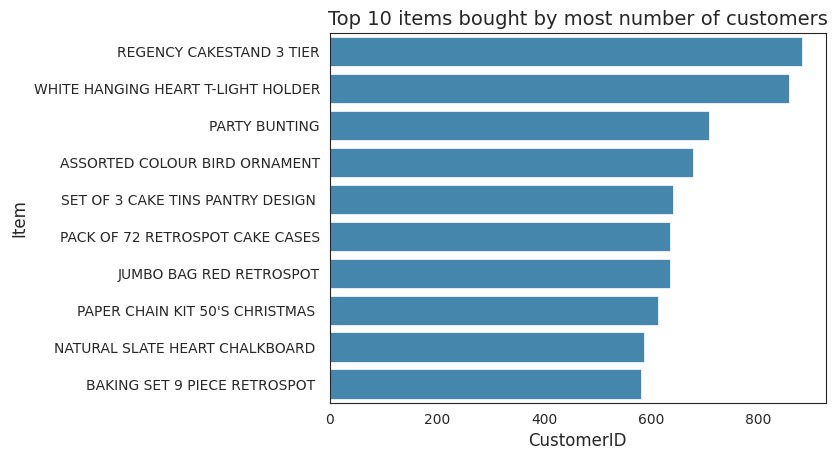

In [26]:
most_bought.reset_index(inplace=True)
sns.set_style('white')
sns.barplot(y='Description', x='CustomerID', data=most_bought.head(10))
plt.title('Top 10 items bought by most number of customers', fontsize=14)
plt.ylabel('Item')

## Most frequently ordered items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


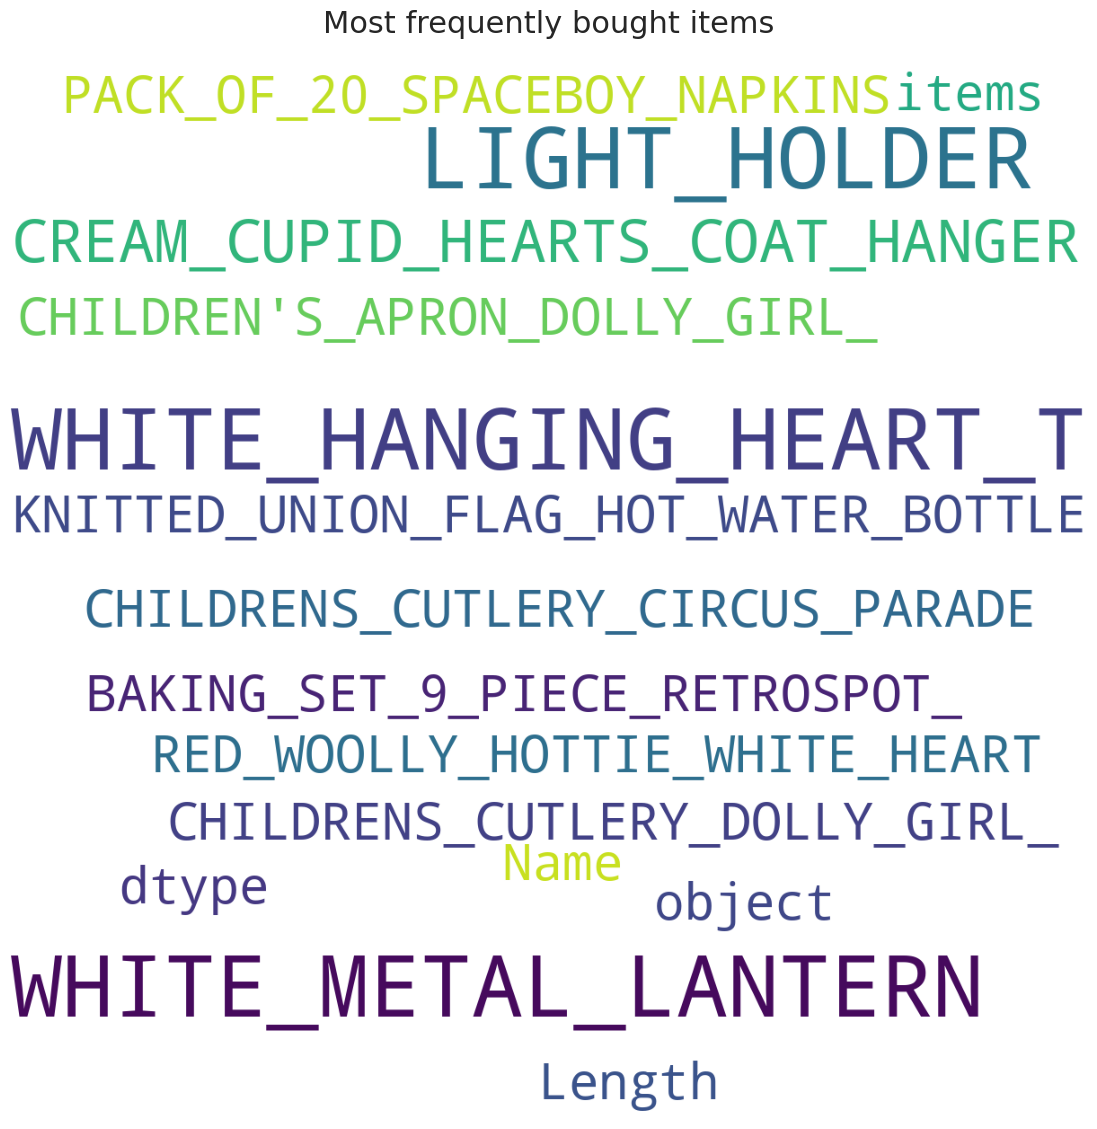

In [27]:
data1['items'] = data1['Description'].str.replace(' ','_')

from wordcloud import WordCloud
plt.rcParams['figure.figsize'] = (14,14)
wordcloud = WordCloud(background_color = 'white', width=1200, height=1200, max_words=121).generate(str(data1['items']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most frequently bought items', fontsize=22)
plt.show()

## Top ten First choices

In [28]:
l = data1['InvoiceNo']
l = l.to_list()
len(l)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


397924

In [29]:
#making unique invoice list
invoices_list = list(set(l))
len(invoices_list)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


18536

In [30]:
first_choices_list = []
for i in invoices_list:
  first_purchase_list = data1[data1['InvoiceNo']==i]['items'].reset_index(drop=True)[0]
  #appending
  first_choices_list.append(first_purchase_list)

first_choices_list[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['NO_SINGING_METAL_SIGN',
 'RABBIT_NIGHT_LIGHT',
 'WOODLAND_DESIGN__COTTON_TOTE_BAG',
 'WOOD_STAMP_SET_BEST_WISHES',
 'WRAP_DOILEY_DESIGN']

In [31]:
len(first_choices_list)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


18536

In [32]:
count = Counter(first_choices_list)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
df_first_choices = pd.DataFrame.from_dict(count, orient='index').reset_index()
df_first_choices.rename(columns={'index':'item', 0:'count'}, inplace=True)
df_first_choices.sort_values(by='count', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,item,count
291,REGENCY_CAKESTAND_3_TIER,203
45,WHITE_HANGING_HEART_T-LIGHT_HOLDER,181
1,RABBIT_NIGHT_LIGHT,155
82,PARTY_BUNTING,122
64,Manual,119
...,...,...
2136,PINK_BUNNY_EASTER_EGG_BASKET,1
2137,ROUND_SNACK_BOXES_SET_OF_4_SKULLS,1
2138,LAVENDER_INCENSE_IN_TIN,1
1491,GREEN_SQUARE_COMPACT_MIRROR,1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Item')

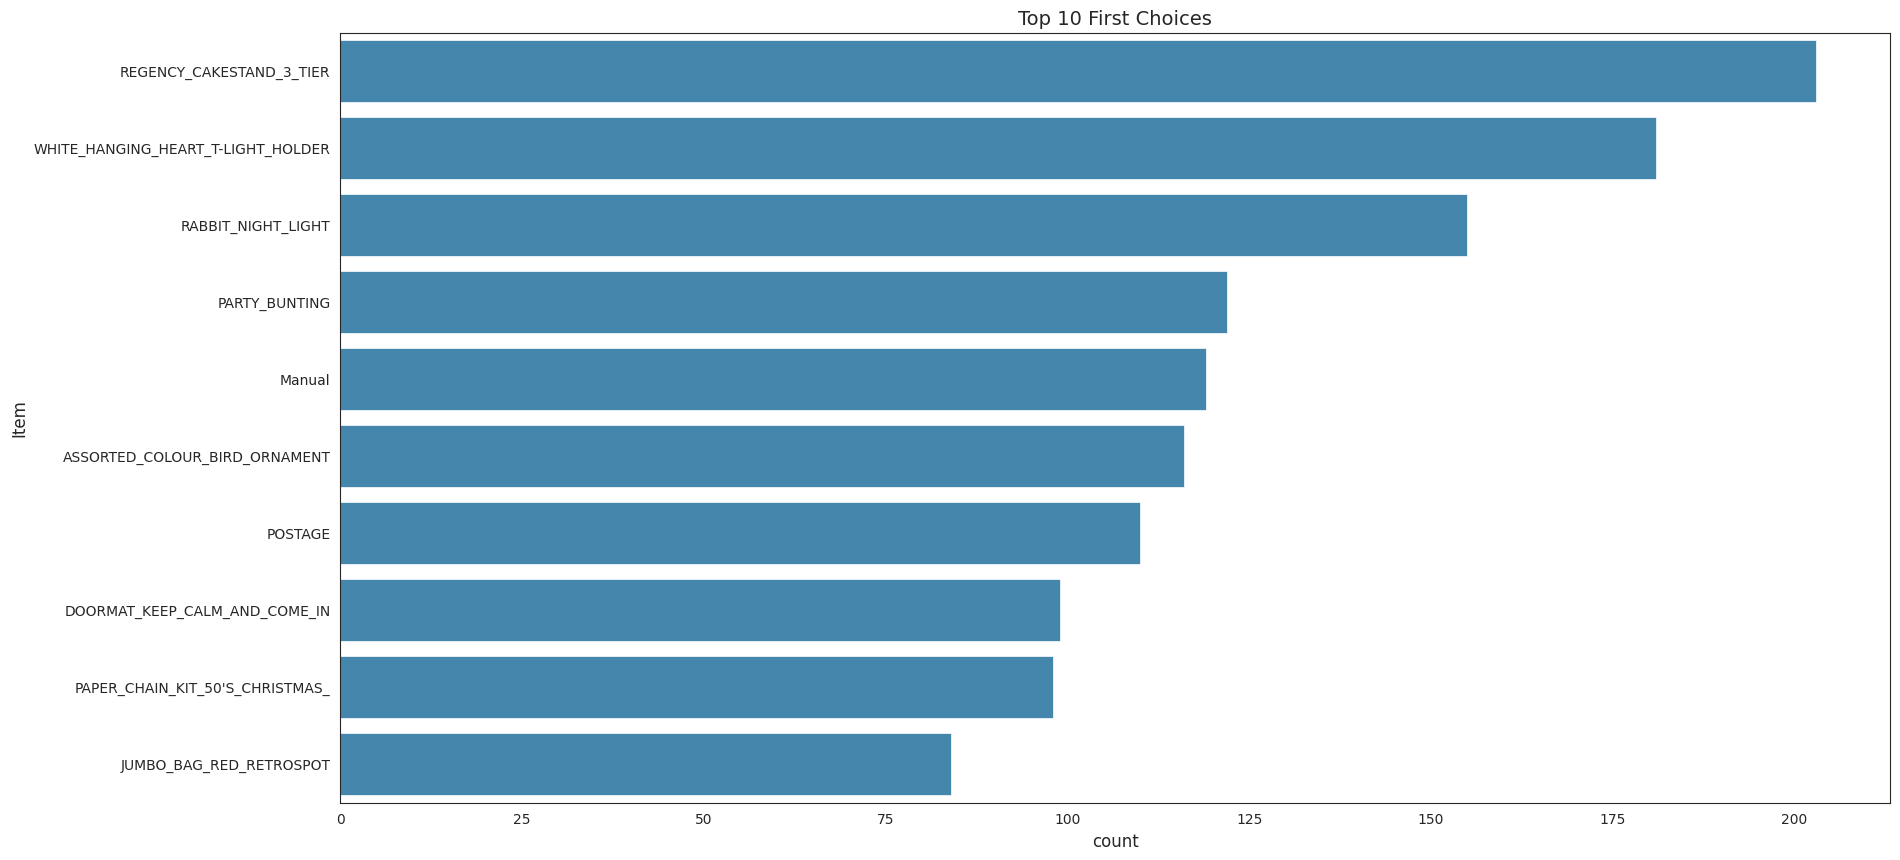

In [34]:
plt.subplots(figsize=(20,10))
sns.set_style('white')
sns.barplot(y='item', x='count', data=df_first_choices.sort_values(by='count', ascending=False).head(10))
plt.title('Top 10 First Choices', fontsize=14)
plt.ylabel('Item')

# **Frequently Bought Together (MBA)**

In [35]:
market_basket = (data1.groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))
market_basket.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
def encode_units(x):
  if x<1:
    return 0
  if x>=1:
    return 1

market_basket = market_basket.applymap(encode_units)
market_basket.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536370,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
536371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Association using mlxtend**

In [37]:
product_wooden_star_df = market_basket.loc[market_basket['WOODEN STAR CHRISTMAS SCANDINAVIAN']==1]

#if A=> then B
itemsets_frequent = apriori(product_wooden_star_df, min_support=0.15, use_colnames=True)

prod_wooden_star_rules = association_rules(itemsets_frequent, metric="lift", min_threshold=1)

#sort the rules on lift and support
prod_wooden_star_rules.sort_values(['lift','support'], ascending=False).reset_index(drop=True).head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(WOODEN TREE CHRISTMAS SCANDINAVIAN),(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.521940,0.736721,0.420323,0.805310,1.093101,0.035799,1.352299,0.178160
1,(WOODEN HEART CHRISTMAS SCANDINAVIAN),(WOODEN TREE CHRISTMAS SCANDINAVIAN),0.736721,0.521940,0.420323,0.570533,1.093101,0.035799,1.113147,0.323501
2,"(WOODEN STAR CHRISTMAS SCANDINAVIAN, WOODEN TR...",(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.521940,0.736721,0.420323,0.805310,1.093101,0.035799,1.352299,0.178160
3,"(WOODEN STAR CHRISTMAS SCANDINAVIAN, WOODEN HE...",(WOODEN TREE CHRISTMAS SCANDINAVIAN),0.736721,0.521940,0.420323,0.570533,1.093101,0.035799,1.113147,0.323501
4,(WOODEN TREE CHRISTMAS SCANDINAVIAN),"(WOODEN STAR CHRISTMAS SCANDINAVIAN, WOODEN HE...",0.521940,0.736721,0.420323,0.805310,1.093101,0.035799,1.352299,0.178160


Association rule mining is a technique used in data mining to discover relationships or associations between variables within large datasets, particularly in market basket analysis. It helps identify sets of items that frequently co-occur in transactions. The concepts you've listed are key metrics used to evaluate the strength and relevance of these discovered rules. Here’s a breakdown of each term:

1. Antecedents and Consequents
Antecedents: These are items found on the left-hand side of an association rule. In the context of market basket analysis, they are the items that a customer buys.
Consequents: These are items on the right-hand side of an association rule. They are the items that are likely to be bought together with the antecedents.
For example, in the rule {bread} -> {butter}, bread is the antecedent, and butter is the consequent.

2. Support
Antecedent Support: The proportion of transactions in the dataset that contain the antecedent.
Consequent Support: The proportion of transactions in the dataset that contain the consequent.
Support: This metric gives the proportion of all transactions that contain both the antecedent and consequent. It measures how frequently the rule occurs in the dataset.
3. Confidence
Confidence: A measure of the reliability of the rule. It is the proportion of transactions with the antecedent that also include the consequent. High confidence indicates a high likelihood that the consequent is purchased when the antecedent is purchased.
4. Lift
Lift: A measure of how much more often the antecedent and consequent occur together than expected if they were statistically independent. A lift value greater than 1 indicates that the antecedent and consequent occur together more often than expected, which suggests a positive relationship between them.
5. Leverage
Leverage: Measures the difference in the support for the antecedent and consequent appearing together in the data and what would be expected if they were independent. A higher leverage value indicates a stronger association.
6. Conviction
Conviction: A metric that compares the likelihood that the antecedent is present without the consequent if they were dependent with the actual frequency of the appearance of the antecedent without the consequent. A higher conviction means it is more likely that the consequent is highly dependent on the antecedent.
7. Zhang's Metric
Zhang's Metric: This metric measures the certainty and direction of the implication of the rule. It takes values between -1 and 1, where 1 indicates a perfect positive association between the antecedent and consequent, 0 indicates no association, and -1 indicates a perfect negative association.
What to Look For
When analyzing association rules:

High Support indicates that the rule involves items frequently purchased together, but it doesn't necessarily imply a strong association.
High Confidence suggests a strong predictive power, meaning if the antecedent is bought, the consequent is likely to be bought too.
High Lift and Conviction values indicate strong and potentially useful rules.
Leverage helps identify rules that have a significant impact on the dataset.
Zhang's Metric provides a directional measure of the association's certainty.
Choosing which metrics to focus on can depend on the specific context and objectives of the analysis. Generally, lift, confidence, and leverage are among the most commonly considered metrics for evaluating the effectiveness and relevance of association rules.